In [3]:
# 데이터 분석
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 머신러닝 
from tensorflow.keras import models, layers
import tensorflow.keras as keras 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers

## 섞인 데이터를 dog와 cat폴더로 분류하기

In [4]:
import os
import cv2
import shutil
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from IPython.display import Image

In [4]:
save_path = "/Users/changmin.kim/Desktop/jupyterNotebook/dataset/dogs-vs-cats/cats_and_dogs"
try:
    os.makedirs(save_path)
    
except Exception:
    print("exist already")

exist already


In [5]:
train_save_dir = os.path.join(save_path,'train')
validation_save_dir = os.path.join(save_path,"validation")
test_save_dir = os.path.join(save_path,'test')
try:
    os.makedirs(train_save_dir)

    os.makedirs(validation_save_dir)
    
    os.makedirs(test_save_dir)
    
    
except Exception:
    print("exist already")

exist already


In [6]:
train_save_cats_dir = os.path.join(train_save_dir,"cats")
train_save_dogs_dir = os.path.join(train_save_dir,"dogs")

validation_save_cats_dir = os.path.join(validation_save_dir,"cats")
validation_save_dogs_dir = os.path.join(validation_save_dir,"dogs")

test_save_cats_dir = os.path.join(test_save_dir,"cats")
test_save_dogs_dir = os.path.join(test_save_dir,"dogs")
try:
    os.makedirs(validation_save_cats_dir)
    os.makedirs(validation_save_dogs_dir)
    
    os.makedirs(train_save_cats_dir)
    os.makedirs(train_save_dogs_dir)

    os.makedirs(test_save_cats_dir)
    os.makedirs(test_save_dogs_dir)
except:
    print("exist already")

exist already


In [7]:
dogs_vs_cats_path = "/Users/changmin.kim/Desktop/jupyterNotebook/dataset/dogs-vs-cats"
print(os.listdir(dogs_vs_cats_path))
train_path = os.path.join(dogs_vs_cats_path,"train")
test_path = os.path.join(dogs_vs_cats_path,"test")

['.DS_Store', 'test', 'sampleSubmission.csv', 'cats_and_dogs', 'dogs_cats_data.npy', 'train']


In [8]:
TRAIN_DIR = "/Users/changmin.kim/Desktop/jupyterNotebook/dataset/dogs-vs-cats/train" # 폴더 주소
ost = os.listdir(TRAIN_DIR) # 폴더속 원소 이름 반환 
try :
    ost.remove('.DS_Store') # 만약 .DS_Store가 있으면 삭제 해주기
except Exception:
    print("Not exist .Ds_Store")
train_folder_list = np.array(ost)

Not exist .Ds_Store


## 이미지 따로 저장 하기 

### train 이미지 

In [30]:
for i in range(0,18000):
    fname = train_folder_list[i]
    src = os.path.join(TRAIN_DIR,fname)
    if(fname.split('.')[0]=="dog"):
        dst = os.path.join(train_save_dogs_dir,fname)
        shutil.copyfile(src,dst)
    
    if(fname.split('.')[0]=="cat"):
        dst = os.path.join(train_save_cats_dir,fname)
        shutil.copyfile(src,dst)

### validation 이미지 

In [31]:
for i in range(18000,20000):
    fname = train_folder_list[i]
    src = os.path.join(TRAIN_DIR,fname)
    if(fname.split('.')[0]=="dog"):
        dst = os.path.join(validation_save_dogs_dir,fname)
        shutil.copyfile(src,dst)
    
    if(fname.split('.')[0]=="cat"):
        dst = os.path.join(validation_save_cats_dir,fname)
        shutil.copyfile(src,dst)

### test 이미지 

In [32]:
for i in range(20000,25000):
    fname = train_folder_list[i]
    src = os.path.join(TRAIN_DIR,fname)
    if(fname.split('.')[0]=="dog"):
        dst = os.path.join(test_save_dogs_dir,fname)
        shutil.copyfile(src,dst)
    
    if(fname.split('.')[0]=="cat"):
        dst = os.path.join(test_save_cats_dir,fname)
        shutil.copyfile(src,dst)

## 이미지 numpy로 바꾸어서 저장하기

### 이미지 resizing

In [10]:
def resizing(xData,yData,folder_list,DIR_PATH):
    for i in range(len(folder_list)):
        path = os.path.join(DIR_PATH,folder_list[i])
        img_list = os.listdir(path)
        for j in range(len(img_list)):
            image = cv2.imread(os.path.join(path,img_list[j]))
            image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
            while True:
                if(int(image.shape[0])/2<100):
                    image = cv2.resize(image,(100,100))
                    break
                image = cv2.resize(image,(int(image.shape[1]/2),int(image.shape[0]/2)))
            xData.append(image)
            yData.append(onehot_encoder[i])
    return np.array(xData), np.array(yData)

### Train 이미지

In [5]:
TRAIN_DIR = "/Users/changmin.kim/Desktop/jupyterNotebook/dataset/dogs-vs-cats/cats_and_dogs/train" # 폴더 주소
ost = os.listdir(TRAIN_DIR) # 폴더속 원소 이름 반환 
ost.remove('.DS_Store') # 만약 .DS_Store가 있으면 삭제 해주기
train_folder_list = np.array(ost)

label_encoder = LabelEncoder() # 폴더 수를 숫자로 반환 
integer_encoded = label_encoder.fit_transform(train_folder_list)
print(integer_encoded)
onehot_encoder = OneHotEncoder(sparse=False) # one_hot으로 바꾸어줌
integer_encoded = integer_encoded.reshape(len(integer_encoded),1)
onehot_encoder = onehot_encoder.fit_transform(integer_encoded)

[1 0]


/Users/changmin.kim/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [6]:
print(train_folder_list)
print(onehot_encoder)

['dogs' 'cats']
[[0. 1.]
 [1. 0.]]


In [11]:
xTrain = []
yTrain = []

In [12]:
xTrain, yTrain = resizing(xTrain,yTrain,train_folder_list,TRAIN_DIR)

In [13]:
print(np.shape(xTrain))
print(np.shape(yTrain))

(18000, 100, 100, 3)
(18000, 2)


[1. 0.]


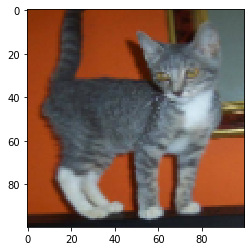

In [967]:
plt.imshow(xTrain[10001])
print(yTrain[10001])

In [20]:
VALID_DIR = "/Users/changmin.kim/Desktop/jupyterNotebook/dataset/dogs-vs-cats/cats_and_dogs/validation" # 
ost = os.listdir(VALID_DIR)
ost.remove('.DS_Store') # 만약 .DS_Store가 있으면 삭제 해주기
valid_folder_list = np.array(ost)
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(valid_folder_list)
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded),1)
onehot_encoder = onehot_encoder.fit_transform(integer_encoded)

/Users/changmin.kim/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [21]:
print(valid_folder_list)
print(onehot_encoder)

['dogs' 'cats']
[[0. 1.]
 [1. 0.]]


In [22]:
xValid = []
yValid = []

In [23]:
xValid, yValid = resizing(xValid,yValid,valid_folder_list,VALID_DIR)

In [24]:
print(np.shape(xValid))
print(np.shape(yValid))

(2000, 100, 100, 3)
(2000, 2)


[0. 1.]


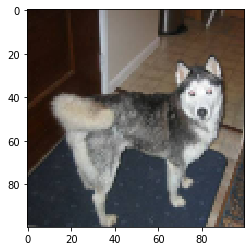

In [25]:
plt.imshow(xValid[0])
print(yValid[0])

In [26]:
TEST_DIR = "/Users/changmin.kim/Desktop/jupyterNotebook/dataset/dogs-vs-cats/cats_and_dogs/test"# 
ost = os.listdir(TEST_DIR)
ost.remove('.DS_Store') # 만약 .DS_Store가 있으면 삭제 해주기
test_folder_list = np.array(ost)
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(test_folder_list)
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded),1)
onehot_encoder = onehot_encoder.fit_transform(integer_encoded)

/Users/changmin.kim/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [27]:
print(test_folder_list)
print(onehot_encoder)

['dogs' 'cats']
[[0. 1.]
 [1. 0.]]


In [28]:
xTest = []
yTest = []

In [29]:
xTest, yTest = resizing(xTest,yTest,test_folder_list,TEST_DIR)

In [30]:
print(np.shape(xTest))
print(np.shape(yTest))

(5000, 100, 100, 3)
(5000, 2)


[1. 0.]


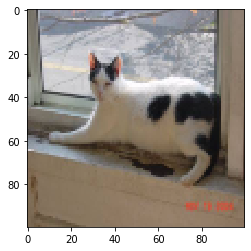

In [31]:
plt.imshow(xTest[3000])
print(yTest[3000])

In [981]:
# data suffling
for i in range(50):
    # train데이터 shuffle
    idx = np.arange(0,len(xTrain))
    np.random.shuffle(idx)
    xTrain = xTrain[idx]
    yTrain = yTrain[idx]
    
    # validation데이터 shuffle
    idx = np.arange(0,len(xValid))
    np.random.shuffle(idx)
    xValid = xValid[idx]
    yValid = yValid[idx]
    
    # test데이터 shuffle
    idx = np.arange(0,len(xTest))
    np.random.shuffle(idx)
    xTest = xTest[idx]
    yTest = yTest[idx]

[0. 1.]


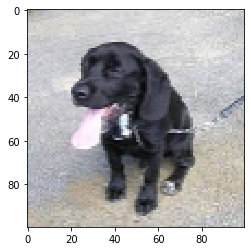

[1. 0.]


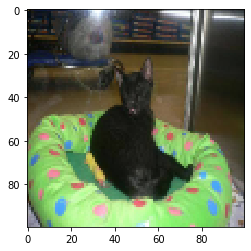

[1. 0.]


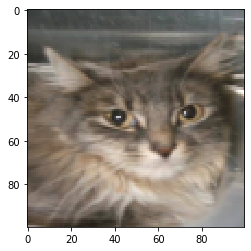

In [32]:
import random

# 점검 해보기 
i = random.randint(0,len(xTrain))
print(yTrain[i])
plt.imshow(xTrain[i])
plt.show()

i = random.randint(0,len(xValid))
print(yValid[i])
plt.imshow(xValid[i])
plt.show()

i = random.randint(0,len(xTest))
print(yTest[i])
plt.imshow(xTest[i])
plt.show()



In [35]:
cats_dogs_dataset = []
cats_dogs_dataset.append(xTrain)
cats_dogs_dataset.append(yTrain)
cats_dogs_dataset.append(xValid)
cats_dogs_dataset.append(yValid)
cats_dogs_dataset.append(xTest)
cats_dogs_dataset.append(yTest)

# 개수가 맞는 지 보기
print(np.shape(cats_dogs_dataset))

(4,)


## Featurewise/Samplewise

In [33]:
from tensorflow.keras.datasets import cifar10

In [34]:
(data,b),(c,d) = cifar10.load_data()

### Featurewise
- 전체 데이터셋에 대해서 평균을 구하는 것을 의미.
- 트레이닝 셋에서 전체 데이터셋에 대한 평균을 구하고 이걸 테스트셋에 그대로 적용해주어야함.

### 종류
- Mean subtraction
    - 각 픽셀의 평균을 구하는 방식.
    - 이미지가 많이 뭉개져버린다는 단점이 있음.

- Channel mean subtraction
    - 채널별(R,G,B)로 평균을 구하고 그 평균을 빼주는 방법.
    - 색상도 보정(다른 이미지들의 색상과 맞춤)되었고 사진도 뭉게지는 현상이 나타나지 않음.

### Samplewise
- 첫번째 샘플에서 첫번째 샘플의 평균을 째고 두번째 샘플에서 두번째 샘플의 평균을 빼는 것을 의미.
- 스케일링 효과 때문에 밝기가 보정이 되었지만 당연하게도 색상은 보정되지 않음.
- 단순 스케일링 효과이고 전체 데이터셋을 보지 않고도 할 수 있기 때문에 레이어 구조에 그냥 집어넣어서 실시간으로 스케일링해주는 용도로 사용.

간단한 프로젝트에서는 단순 samplewise center & normalization으로 충분<br>
큰 프로젝트라면 featurewise center를 쓴다.

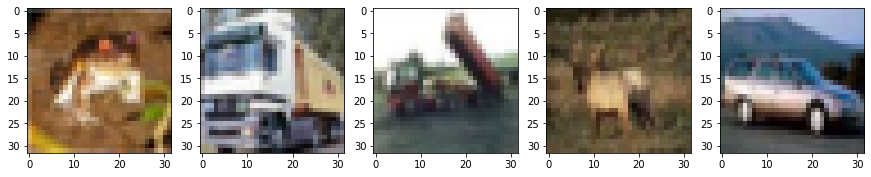

In [35]:
data_sample = []
plt.figure(figsize=(15,10))
for i in range(5):
    data_sample.append(data[i])
    plt.subplot(1,5,i+1)
    plt.imshow(data_sample[i])
data_sample = np.array(data_sample)

#### Mean subtraction

In [36]:
def mean_normalize(X_train):
    """Mean normalize

    Args:
        X_train (4-D Array): of shape (N, H, W, C)
        
    Returns:
        X_normalized (4-D Array): of shape (N, H, W, C)
    """
    
    N, H, W, C = X_train.shape
    X_flat = X_train.reshape(N, -1)
    
    mean_image = X_flat.mean(axis=0).reshape(1, -1)
    
    X_normalized = (X_flat - mean_image)
    
    return X_normalized.reshape(N, H, W, C)

W0611 09:24:51.782682 4603534784 image.py:693] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0611 09:24:51.795607 4603534784 image.py:693] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0611 09:24:51.808274 4603534784 image.py:693] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0611 09:24:51.821171 4603534784 image.py:693] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0611 09:24:51.833091 4603534784 image.py:693] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


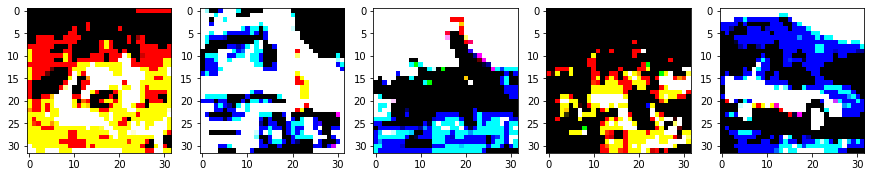

In [37]:
plt.figure(figsize=(15,10))

for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(mean_normalize(data_sample)[i])
plt.show()

#### Channel Mean Subtraction

In [38]:
data_sample.shape

(5, 32, 32, 3)

In [39]:
def channel_mean_normalize(X_train):
    N, H, W, C = X_train.shape
    X_flat = X_train.reshape(-1, C)
    
    channel_mean_image = X_flat.mean(axis=0).reshape(1, -1)
    X_normalized = X_flat - channel_mean_image
    
    return X_normalized.reshape(N, H, W, C)

W0611 09:24:54.441487 4603534784 image.py:693] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0611 09:24:54.455418 4603534784 image.py:693] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0611 09:24:54.468671 4603534784 image.py:693] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0611 09:24:54.481948 4603534784 image.py:693] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0611 09:24:54.495635 4603534784 image.py:693] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


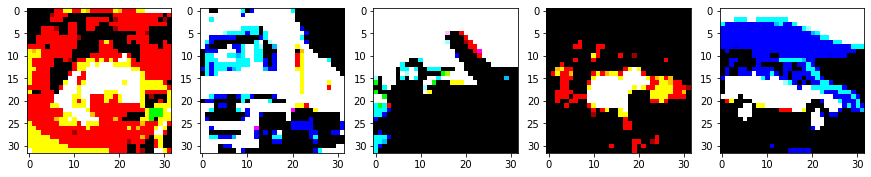

In [40]:
plt.figure(figsize=(15,10))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(channel_mean_normalize(data_sample)[i])
plt.show()

#### samplewise

In [110]:
def samplewise_normalize(X_train):
    N, H, W, C = X_train.shape
    
    X_flat = X_train.reshape(N, -1)
    
    sample_mean = X_flat.mean(axis=1).reshape(-1, 1)
    sample_std = X_flat.std(axis=1).reshape(-1, 1)
    
    X_normalized = (X_flat - sample_mean) / sample_std
    
    return X_normalized.reshape(N, H, W, C)

W0611 12:50:09.081558 4603534784 image.py:693] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0611 12:50:09.092271 4603534784 image.py:693] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0611 12:50:09.106674 4603534784 image.py:693] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0611 12:50:09.122477 4603534784 image.py:693] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0611 12:50:09.138885 4603534784 image.py:693] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


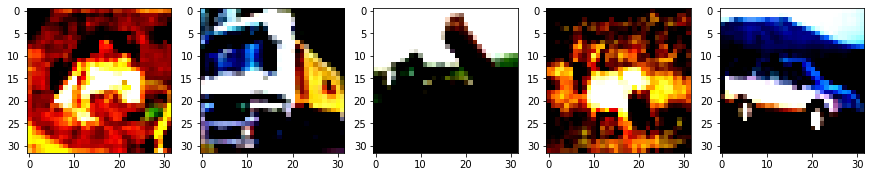

In [111]:
plt.figure(figsize=(15,10))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(samplewise_normalize(data_sample)[i])
plt.show()

In [46]:
for i in range(5):
    h = Image.fromarray(data_sample[i],'RGB')
    h.save(os.path.join('/Users/changmin.kim/Desktop/jupyterNotebook/dataset/test/a','image{}.jpg'.format(i)))

AttributeError: type object 'Image' has no attribute 'fromarray'

#### featurewise_center/std_normalization

In [52]:
sample_generator = ImageDataGenerator(
    featurewise_center=True, 
    featurewise_std_normalization=True,
    
    )

In [53]:
ss = sample_generator.flow_from_directory(
    directory= '/Users/changmin.kim/Desktop/jupyterNotebook/dataset/test',
    target_size=(32, 32),
    batch_size=5,
    shuffle=False
)

Found 5 images belonging to 1 classes.


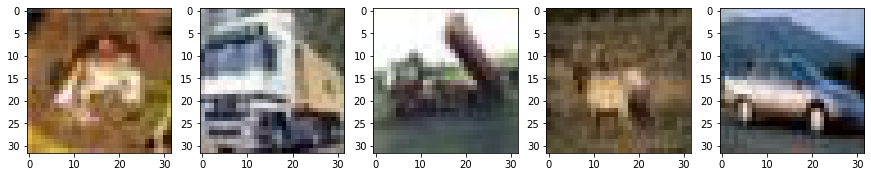

In [54]:
h = next(iter(ss))[0].astype('uint8')
plt.figure(figsize=(15,10))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(h[i])
plt.show()

#### samplewise_center/std_normalization

In [116]:
sample_generator = ImageDataGenerator(
    samplewise_center= True,
    samplewise_std_normalization=True,
    )

In [117]:
ss = sample_generator.flow_from_directory(
    directory= '/Users/changmin.kim/Desktop/jupyterNotebook/dataset/test',
    target_size=(32, 32),
    batch_size=5,
    shuffle=False
)

Found 5 images belonging to 1 classes.


W0611 12:50:38.162417 4603534784 image.py:693] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0611 12:50:38.173887 4603534784 image.py:693] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0611 12:50:38.189512 4603534784 image.py:693] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0611 12:50:38.213698 4603534784 image.py:693] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0611 12:50:38.228547 4603534784 image.py:693] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


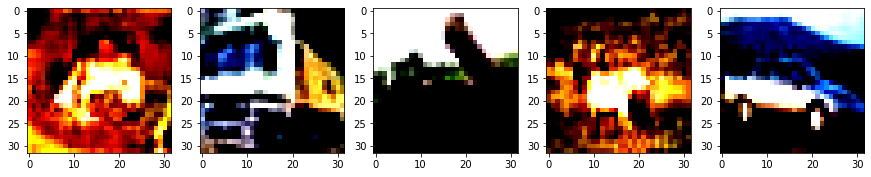

In [119]:
h = next(iter(ss))[0]
plt.figure(figsize=(15,10))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(h[i])
plt.show()

## Bring Train/Test Image And Augmentation

#### rotation_range = 90
지정된 각도 범위내에서 임의로 원본이미지를 회전시킵니다. 단위는 도이며, 정수형입니다. 예를 들어 90이라면 0도에서 90도 사이에 임의의 각도로 회전시킵니다. 
![](http://tykimos.github.io/warehouse/2017-3-8-CNN_Data_Augmentation_5_rotate.png)

#### shear_range = 0.5
밀림 강도 범위내에서 임의로 원본이미지를 변형시킵니다. 수치는 시계반대방향으로 밀림 강도를 라디안으로 나타냅니다. 예를 들어 0.5이라면, 0.5 라이안내외로 시계반대방향으로 변형시킵니다. 
![](http://tykimos.github.io/warehouse/2017-3-8-CNN_Data_Augmentation_5_shear.png)

In [60]:
data = np.load("/Users/changmin.kim/Desktop/jupyterNotebook/dataset/dogs-vs-cats/dogs_cats_data.npy",
               allow_pickle=True)

In [61]:
xTrain,yTrain, xValid,yValid, xTest,yTest = data

In [55]:
image_generator = ImageDataGenerator(
    horizontal_flip=True,
    samplewise_center=True,
    samplewise_std_normalization=True,
    zoom_range=[1,1.3],
    rotation_range=15,
    fill_mode='constant',
    width_shift_range=20,
    height_shift_range=20,
    brightness_range=(0.1,1),# 밝기를 설정하면 정규화가 더욱 잘된다. # 이유는 모르겠다.
    cval=0)

In [56]:
class_mode = "categorical"
target_size = (100,100)

In [62]:
dogs_cats_train_image = image_generator.flow(x=xTrain,y=yTrain,batch_size=300,shuffle=True)

In [63]:
dogs_cats_valid_image = image_generator.flow(x=xValid,y=yValid,batch_size=200,shuffle=True)

In [64]:
dogs_cats_test_image = image_generator.flow(x=xTest,y=yTest,batch_size=100,shuffle=True)

In [57]:
face_train_image = image_generator.flow_from_directory(
    directory=train_save_dir,
    shuffle=True,
    color_mode="rgb",
    target_size=target_size,
    batch_size=300,
    class_mode=class_mode)

Found 18000 images belonging to 2 classes.


W0612 16:39:50.029865 4715707840 image.py:693] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


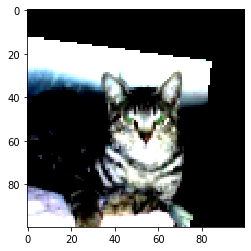

In [71]:
plt.imshow(next(iter(dogs_cats_valid_image))[0][0])

In [72]:
print("Image 타입:",face_train_image[0][0][0].dtype)
print("Target 타입:",face_train_image[0][0][0].dtype)

Image 타입: float32
Target 타입: float32


In [14]:
face_validation_image = image_generator.flow_from_directory(
    validation_save_dir,
    color_mode='rgb',
    target_size = target_size,
    batch_size= 200,
    class_mode = class_mode,
    shuffle=True
)

Found 2000 images belonging to 2 classes.


In [15]:
face_test_image = image_generator.flow_from_directory(
    test_save_dir,
    shuffle=True,
    color_mode="rgb",
    target_size=target_size,
    batch_size=100,
    class_mode=class_mode)

Found 5000 images belonging to 2 classes.


## 이미지 분석

In [92]:
image,target = next(iter(dogs_cats_valid_image))

In [93]:
image.shape

(200, 100, 100, 3)

In [94]:
image[0].shape

(100, 100, 3)

In [95]:
import random

In [96]:
import seaborn as sns

W0612 16:41:16.017770 4715707840 image.py:693] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


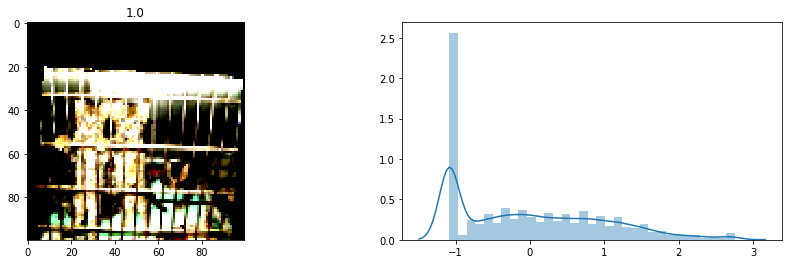

W0612 16:41:16.313379 4715707840 image.py:693] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


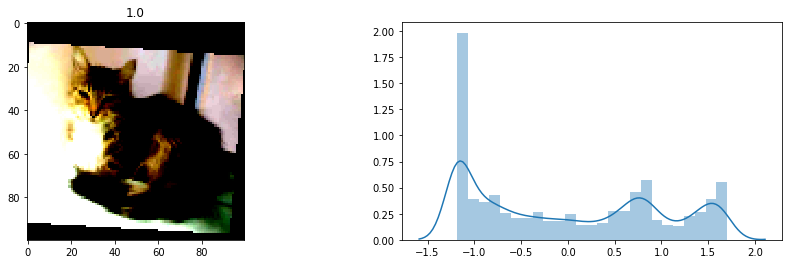

W0612 16:41:16.622159 4715707840 image.py:693] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


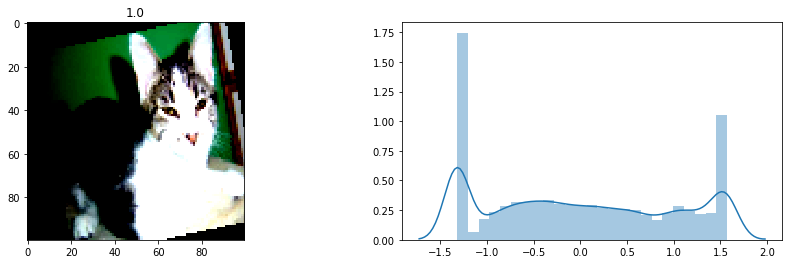

W0612 16:41:16.889690 4715707840 image.py:693] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


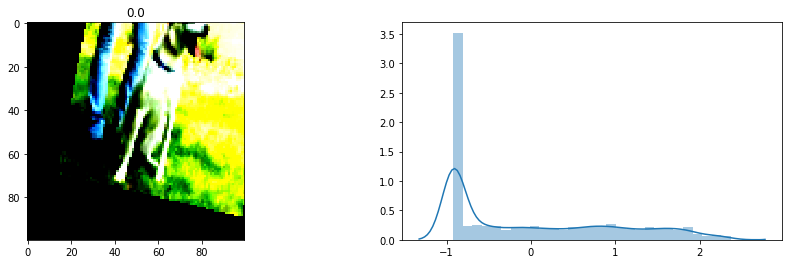

In [97]:
for i in range(4):
    num = random.randint(0,200)
    data = image[num].reshape(image[num].shape[0]*image[num].shape[1]*image[num].shape[2],1)

    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    plt.title(target[num][0])
    plt.imshow(image[num])
    plt.subplot(1,2,2)
    sns.distplot(data,kde=True,hist=True)
    plt.show()

## Feature Extraction

In [98]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

layer1
    - conv1 = (3,3)filter, (1)stride, output_channels = 20
    - Max1 = (2,2)filter, (2)stride
layer2
    - conv2 = (3,3)filter, (1)stride, output_channels = 64
    - Max2 = (2,2)filter, (2)stride
layer3
    - conv3 = (3,3)filter, (1)stride, output_channels = 256
    - Max3 = (2,2)filter, (2)stride
layer4
    - conv4 = (3,3)filter, (1)stride, output_channels = 512

In [99]:
layer1 = nn.Conv2d(in_channels=3,out_channels=20,kernel_size=3).to(torch.device('cpu'))

In [100]:
weight = layer1.weight
print(weight.shape)

torch.Size([20, 3, 3, 3])


In [101]:
weight_detach = weight.detach().numpy()

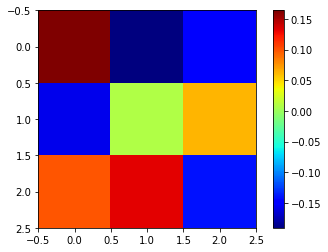

In [102]:
plt.imshow(weight_detach[0,0,:,:],'jet')
plt.colorbar()
plt.show()

In [103]:
image.shape

(200, 100, 100, 3)

In [104]:
image = np.transpose(image,axes=(0,3,1,2))

In [105]:
image.shape

(200, 3, 100, 100)

In [106]:
output_data1 = layer1(torch.tensor(image[0:1]))
output_data1 = output_data1.data
print(output_data1.shape)

torch.Size([1, 20, 98, 98])


In [107]:
output1 = output_data1.cpu().numpy()

In [108]:
image = np.transpose(image,axes=(0,2,3,1))

In [109]:
image.shape

(200, 100, 100, 3)

W0612 16:41:29.139060 4715707840 image.py:693] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([1, 20, 98, 98])


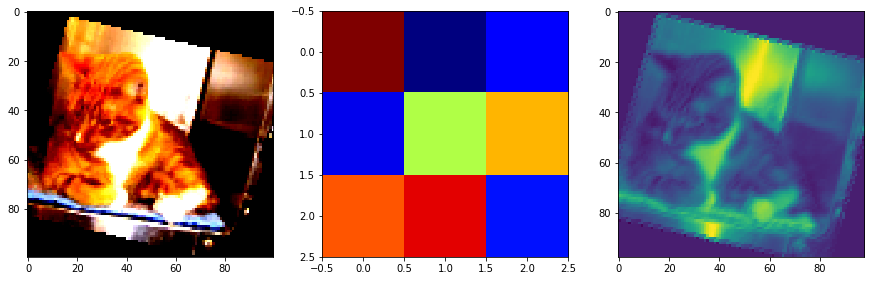

In [110]:
print(output_data1.shape)

plt.figure(figsize=(15,30))
plt.subplot(1,3,1)
plt.imshow(image[0])
plt.subplot(1,3,2)
plt.imshow(weight_detach[0,0,:,:],'jet')
plt.subplot(1,3,3)
plt.imshow(output_data1[0,0,:,:])
plt.show()

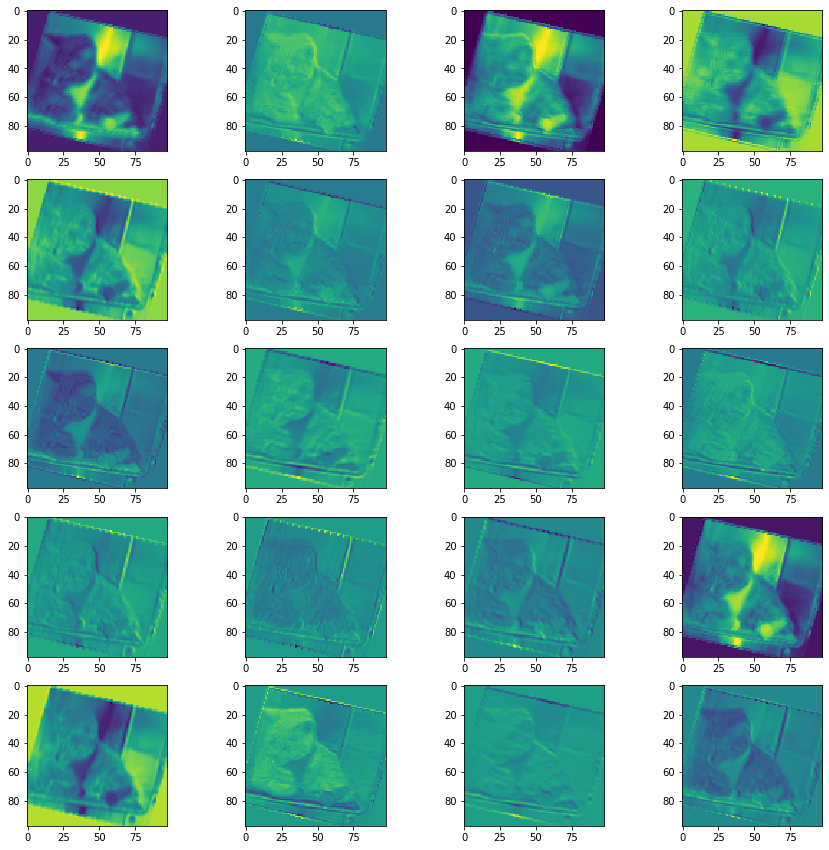

In [111]:
fig = plt.figure(figsize=[13,8])
fig.set_figheight(15)
fig.set_figwidth(15)
for i in range(0,20):
    fig.add_subplot(5, 4, i+1)
    plt.imshow(output1[0,i,:,:])
plt.show()

In [112]:
relu_data1 = F.relu(output_data1)

In [113]:
pool_data1 = F.max_pool2d(relu_data1,2,2)
pool1 = pool_data1.numpy()
print(pool1.shape)

(1, 20, 49, 49)


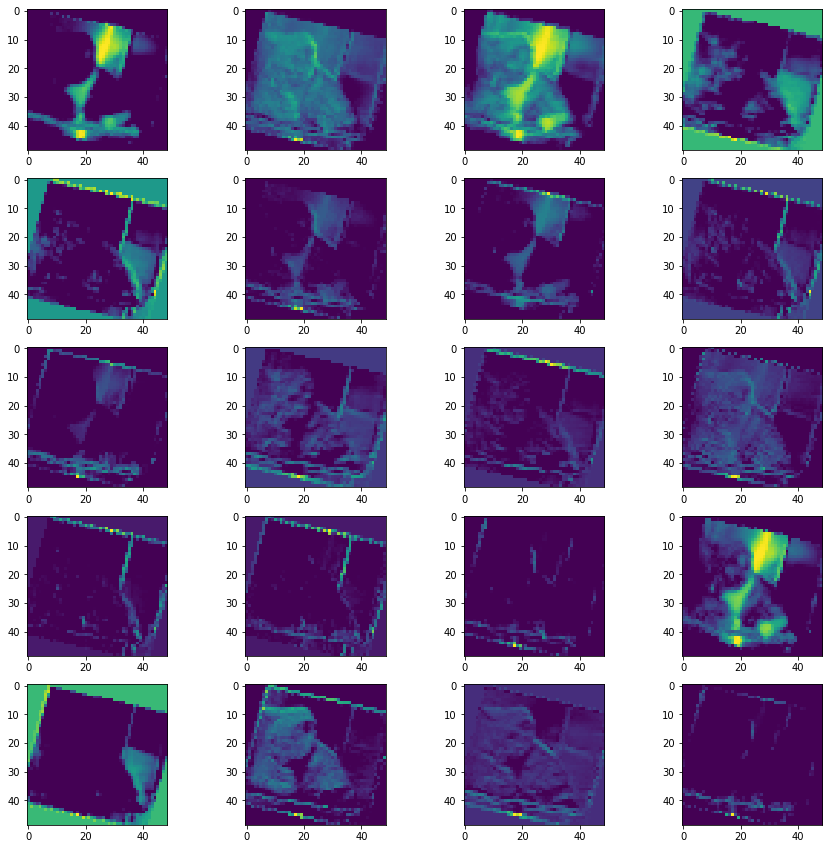

In [114]:
fig = plt.figure(figsize=[13,8])
fig.set_figheight(15)
fig.set_figwidth(15)
for i in range(0,20):
    fig.add_subplot(5, 4, i+1)
    plt.imshow(pool1[0,i,:,:])
plt.show()

In [115]:
layer2 = nn.Conv2d(20,64,3).to(torch.device('cpu'))

In [116]:
output_data2 = layer2(pool_data1)
output_data2 = output_data2.data
output2 = output_data2.cpu().numpy()
print(output2.shape)

(1, 64, 47, 47)


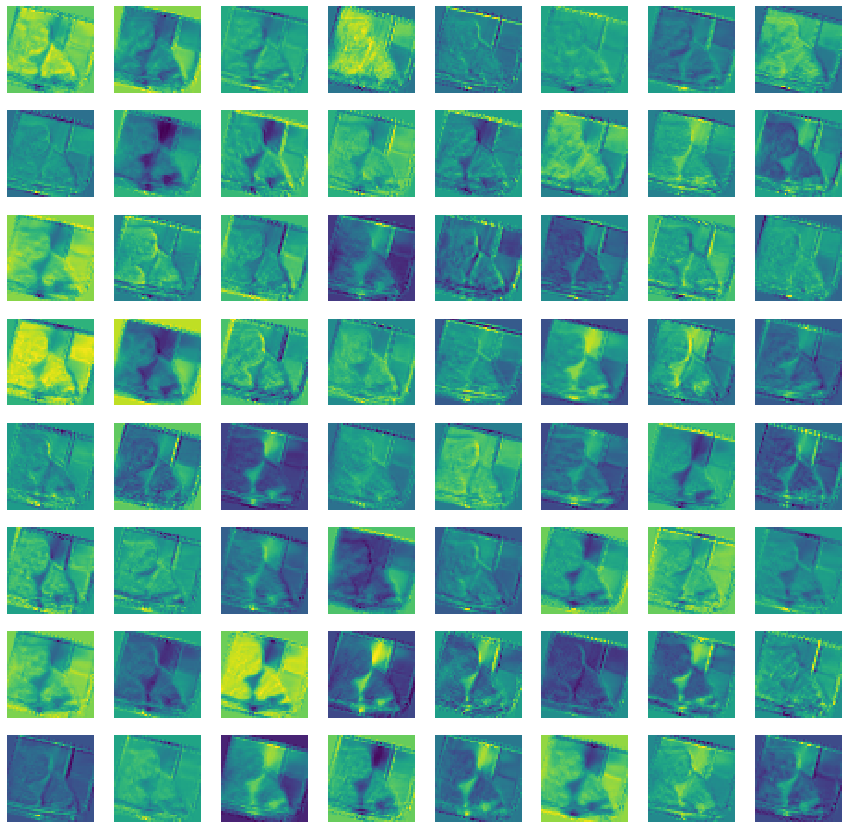

In [117]:
fig = plt.figure(figsize=[13,8])
fig.set_figheight(15)
fig.set_figwidth(15)

for i in range(0,64):
    fig.add_subplot(8, 8, i+1)
    plt.imshow(output2[0,i,:,:])
    plt.axis('off')
plt.show()

In [118]:
relu_data2 = F.relu(output_data2)

In [119]:
pool_data2 = F.max_pool2d(relu_data2,2,2)
pool2 = pool_data2.numpy()
print(pool2.shape)

(1, 64, 23, 23)


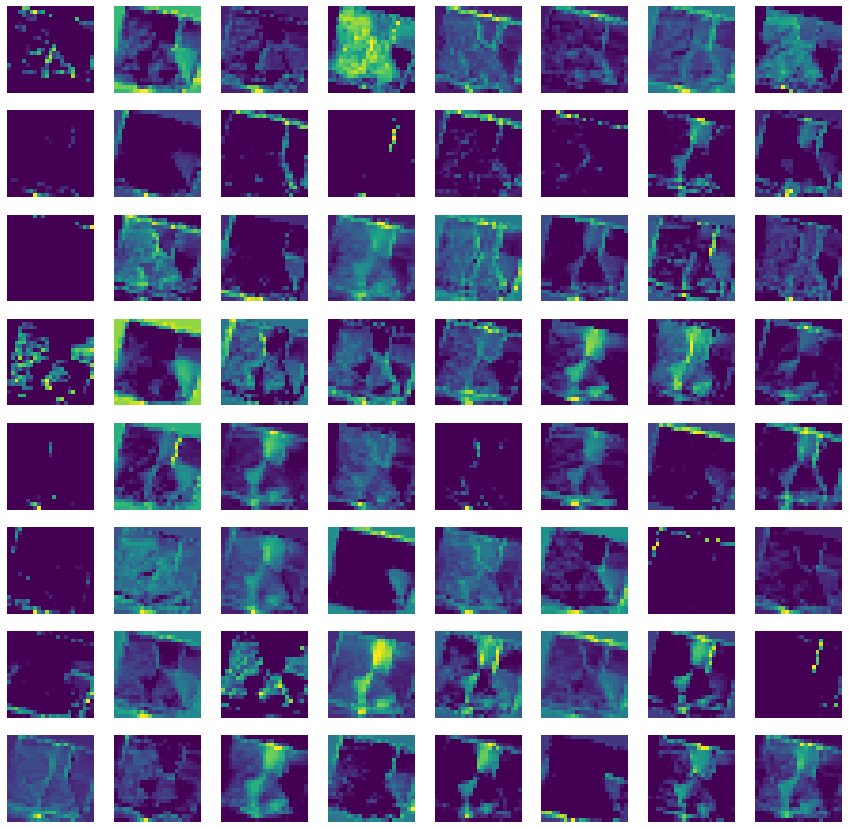

In [120]:
fig = plt.figure(figsize=[13,8])
fig.set_figheight(15)
fig.set_figwidth(15)

for i in range(0,64):
    fig.add_subplot(8, 8, i+1)
    plt.imshow(pool2[0,i,:,:])
    plt.axis('off')
plt.show()


In [121]:
layer3 = nn.Conv2d(64,256,3).to(torch.device('cpu'))

In [122]:
output_data3 = layer3(pool_data2)
output_data3 = output_data3.data
output3 = output_data3.cpu().numpy()
print(output3.shape)

(1, 256, 21, 21)


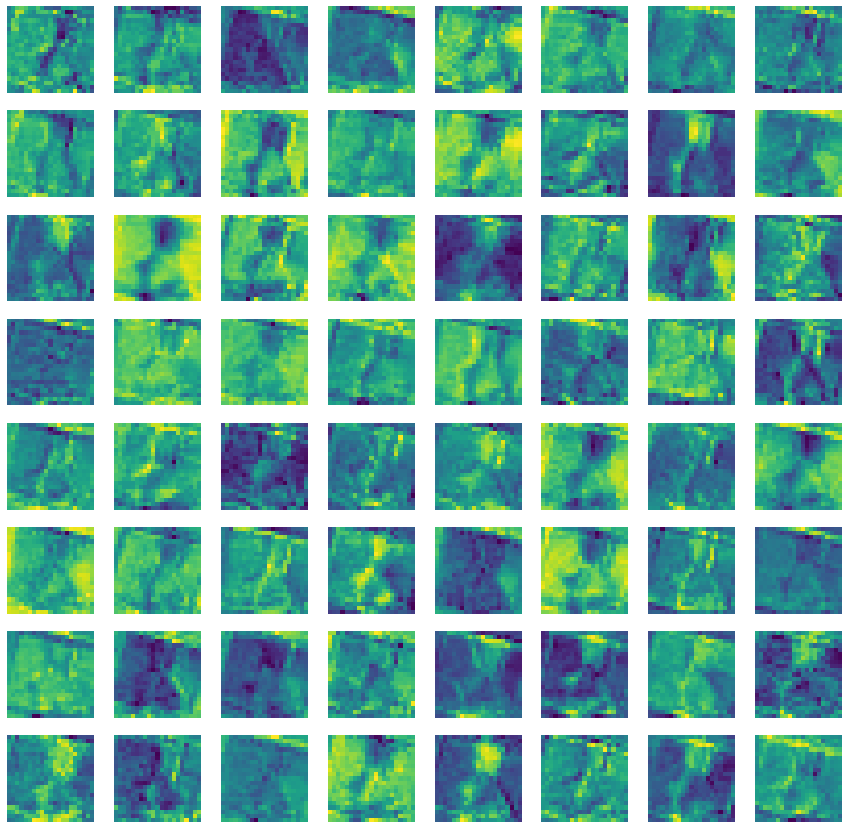

In [123]:
fig = plt.figure(figsize=[13,8])
fig.set_figheight(15)
fig.set_figwidth(15)

for i in range(0,64):
    fig.add_subplot(8, 8, i+1)
    plt.imshow(output3[0,i,:,:])
    plt.axis('off')
plt.show()

In [124]:
relu_data3 = F.relu(output_data3)

In [125]:
pool_data3 = F.max_pool2d(relu_data3,2,2)
pool3 = pool_data3.numpy()

In [126]:
print(pool3.shape)

(1, 256, 10, 10)


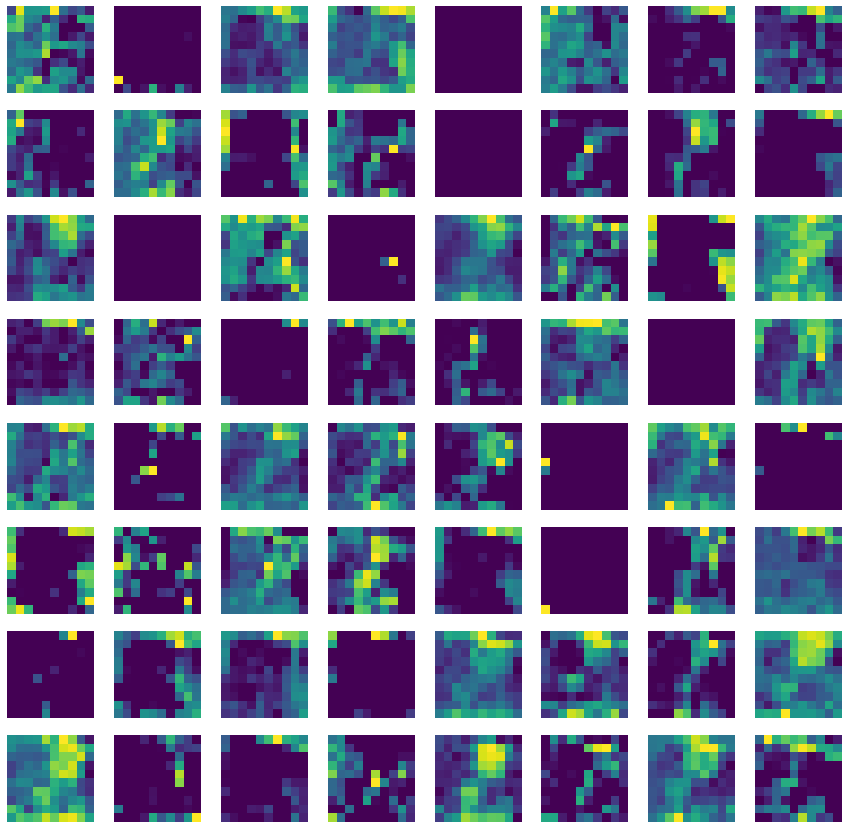

In [127]:
fig = plt.figure(figsize=[13,8])
fig.set_figheight(15)
fig.set_figwidth(15)

for i in range(0,64):
    fig.add_subplot(8, 8, i+1)
    plt.imshow(pool3[0,i,:,:])
    plt.axis('off')
plt.show()

In [135]:
layer4 = nn.Conv2d(256,256,3,padding=1)

In [136]:
output_data4 = layer4(pool_data3)
output_data4 = output_data4.data
output4 = output_data4.cpu().numpy()
print(output4.shape)

(1, 256, 10, 10)


In [137]:
relu_data4 = F.relu(output_data4)
relu4 = relu_data4.numpy()

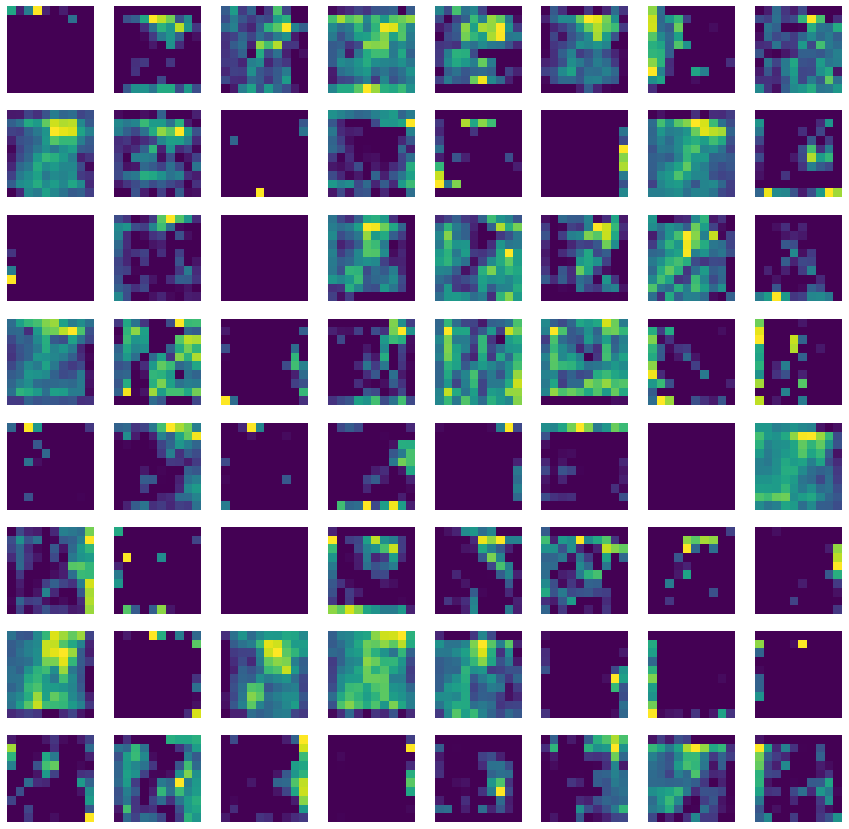

In [138]:
fig = plt.figure(figsize=[13,8])
fig.set_figheight(15)
fig.set_figwidth(15)

for i in range(0,64):
    fig.add_subplot(8, 8, i+1)
    plt.imshow(relu4[0,i,:,:])
    plt.axis('off')
plt.show()

In [139]:
layer5 = nn.Conv2d(256,512,3).to(torch.device('cpu'))

In [140]:
output_data5 = layer5(relu_data4)
output_data5 = output_data5.data
output5 = output_data5.cpu().numpy()
print(output5.shape)

(1, 512, 8, 8)


In [141]:
relu_data5 = F.relu(output_data5)
relu5 = relu_data5.numpy()

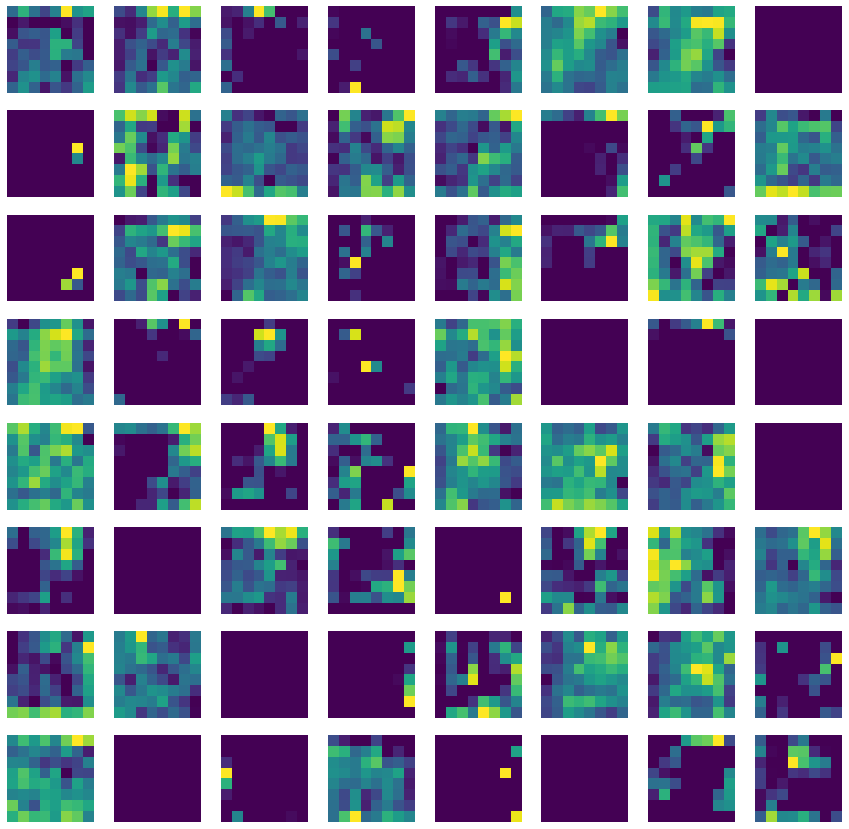

In [142]:
fig = plt.figure(figsize=[13,8])
fig.set_figheight(15)
fig.set_figwidth(15)

for i in range(0,64):
    fig.add_subplot(8, 8, i+1)
    plt.imshow(relu5[0,i,:,:])
    plt.axis('off')
plt.show()

### Feature Extraction Network
layer1
- conv1 = (3,3)filter, (1)stride, output_channels = 20
- relu
- Max1 = (2,2)filter, (2)stride

layer2
- conv2 = (3,3)filter, (1)stride, output_channels = 64
- relu
- Max2 = (2,2)filter, (2)stride

layer3
- conv3 = (3,3)filter, (1)stride, output_channels = 256
- relu
- Max3 = (2,2)filter, (2)stride

layer4
- conv4 = (3,3)filter, (1)stride, output_channels = 256, padding="same"
- relu
    
layer5
- conv5 = (3,3)filter, (1)stride, output_channels = 512
- Flatten
- Dropout(0.2)

### Fully Connected Network

layer6
- Dense(1024)
- BatchNorm
- Relu
- Dropout(0.2)

layer7
- Dense(512)
- BatchNorm
- Relu
- Dropout(0.2)

layer8
- Dense(64)
- BatchNorm
- Relu

layer9
- Dense(2)
- softmax

## Model Network

In [155]:
network = models.Sequential()

# Feauture Extraction Network
#layer1
network.add(layers.Conv2D(20,(3,3),activation="relu",input_shape=(100,100,3),
                          kernel_initializer='he_normal'))
network.add(layers.MaxPool2D((2,2)))


#layer2
network.add(layers.Conv2D(64,(3,3),activation="relu",kernel_initializer='he_normal'))
network.add(layers.MaxPool2D((2,2)))

#layer3
network.add(layers.Conv2D(256,(3,3),activation="relu",kernel_initializer='he_normal'))
network.add(layers.MaxPool2D((2,2)))

#layer4
network.add(layers.Conv2D(256,(3,3),activation="relu",kernel_initializer='he_normal',
                          padding="same"))

#layer5
network.add(layers.Conv2D(512,(3,3),activation="relu",kernel_initializer='he_normal'))

# Fully conntected Network

#layer6
network.add(layers.Flatten())
network.add(layers.Dropout(0.2))

#layer7
network.add(layers.Dense(1024))
network.add(layers.BatchNormalization())
network.add(layers.Activation('relu'))
network.add(layers.Dropout(0.2))

#layer8
network.add(layers.Dense(512))
network.add(layers.BatchNormalization())
network.add(layers.Activation('relu'))
network.add(layers.Dropout(0.2))

#layer9
network.add(layers.Dense(64))
network.add(layers.BatchNormalization())
network.add(layers.Activation('relu'))

#layer10
network.add(layers.Dense(2,activation='softmax'))

In [156]:
network.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 98, 98, 20)        560       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 49, 49, 20)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 47, 47, 64)        11584     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 21, 21, 256)       147712    
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 10, 10, 256)       0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 10, 10, 256)      

In [145]:
learning_rate = 0.00001

In [146]:
from tensorflow.keras import losses

In [147]:
network.compile(optimizer=optimizers.Adam(learning_rate),loss=losses.categorical_crossentropy,metrics=['accuracy'])

In [148]:
for data_batch, labels_batch in face_train_image:
    print("train 배치 데이터 크기:",data_batch.shape)
    print("train 배치 레이블 크기:",labels_batch.shape)
    break

train 배치 데이터 크기: (300, 100, 100, 3)
train 배치 레이블 크기: (300, 2)


In [149]:
for data_batch, labels_batch in face_validation_image:
    print("valid 배치 데이터 크기:",data_batch.shape)
    print("valid 배치 레이블 크기:",labels_batch.shape)
    break

valid 배치 데이터 크기: (200, 100, 100, 3)
valid 배치 레이블 크기: (200, 2)


In [150]:
for data_batch, labels_batch in face_test_image:
    print("test 배치 데이터 크기:",data_batch.shape)
    print("test 배치 레이블 크기:",labels_batch.shape)
    break

test 배치 데이터 크기: (100, 100, 100, 3)
test 배치 레이블 크기: (100, 2)


In [858]:
history = network.fit_generator(
    face_train_image,
    steps_per_epoch=60,
    epochs=200,
    validation_data=face_validation_image,
    validation_steps=10
)

W0611 16:18:00.004751 4603534784 deprecation.py:323] From <ipython-input-858-a895c6006f75>:6: Model.fit_generator (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
Please use Model.fit, which supports generators.
W0611 16:18:01.225492 4603534784 data_adapter.py:1091] sample_weight modes were coerced from
  ...
    to  
  ['...']
W0611 16:18:02.025883 4603534784 data_adapter.py:1091] sample_weight modes were coerced from
  ...
    to  
  ['...']


Train for 60 steps, validate for 10 steps
Epoch 1/30
60/60 [==============================] - 195s 3s/step - loss: 0.6804 - accuracy: 0.5646 - val_loss: 0.6624 - val_accuracy: 0.6035
Epoch 2/30
60/60 [==============================] - 202s 3s/step - loss: 0.6509 - accuracy: 0.6200 - val_loss: 0.6320 - val_accuracy: 0.6415
Epoch 3/30
60/60 [==============================] - 189s 3s/step - loss: 0.6389 - accuracy: 0.6304 - val_loss: 0.6259 - val_accuracy: 0.6470
Epoch 4/30
60/60 [==============================] - 192s 3s/step - loss: 0.6286 - accuracy: 0.6448 - val_loss: 0.6083 - val_accuracy: 0.6700
Epoch 5/30
60/60 [==============================] - 185s 3s/step - loss: 0.6181 - accuracy: 0.6538 - val_loss: 0.6124 - val_accuracy: 0.6555
Epoch 6/30
60/60 [==============================] - 182s 3s/step - loss: 0.6165 - accuracy: 0.6552 - val_loss: 0.6037 - val_accuracy: 0.6605
Epoch 7/30
60/60 [==============================] - 178s 3s/step - loss: 0.6125 - accuracy: 0.6622 - val_loss: 0

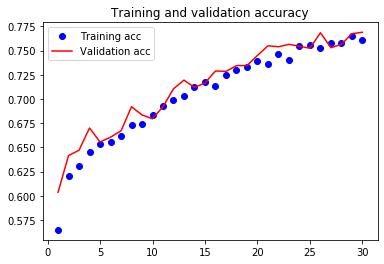

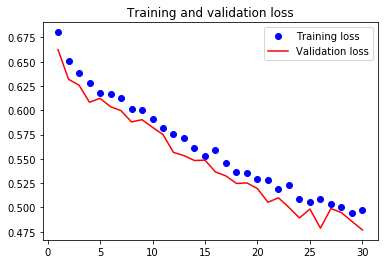

In [866]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'r',label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label="Training loss")
plt.plot(epochs, val_loss, 'r', label="Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

In [867]:
network.save("/Users/changmin.kim/Desktop/jupyterNotebook/model/dogs_vs_cats.h5")

### 컴퓨터 성능 한계상 학습을 오래 할 수 없으므로 colab을 이용해서 학습시키겠다.

### 결과
- 처음에 시도한 모델은 train학습 정확도 84%의 결과가 나왔다.train학습이 90%이상까지 가지 못한것은 cnn과 dense부분의 깊이가 다소 짧아(파라미터가 적어) 그런거 같다. 따라서 layer4(conv4 = (3,3)filter, (1)stride, output_channels = 256, padding="same")와 layer8(Dense(512), BatchNorm, Relu, Dropout(0.2))을 넣어 주었다. BatchNorm을 사용해서 feature들의 스케일을 비슷하게 만들어 하나의 feature에 과적합 되지 않게 하였다. 
kernel초기화는 처음에는 디폴트 값인 **세이비어 초기화**를 사용했지만, 새로운 모델에는 **he 초기화**를 사용했다.
- 결과: train학습 정확도가 95%로 처음 보다 11%로 엄청나게 증가하였다. test에 대한 평가는 90%정도 나왔다.

In [ ]:
keras.initializers.glorot_uniform()

In [ ]:
keras.initializers.Initializer()

In [1]:
import numpy as np